In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [147]:
with open('clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

data_clustering     #Y - не нужен

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [148]:
model = KMeans(n_clusters=2, random_state=0).fit(X)

silhouette_score(X, model.labels_)
adjusted_mutual_info_score(Y, model.labels_)

0.9286022516535728

ДЗ

In [149]:
data = pd.read_csv('7.10_clustering_hw.csv')
data.head(4)

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0


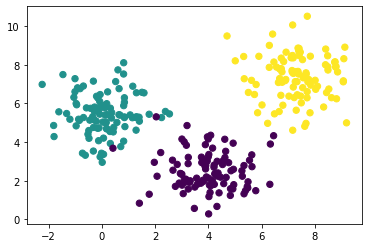

In [164]:
Y = np.array(data.y)
X = np.array(data.drop('y', axis=1)).reshape(-1, 2)

model = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1],s=40, marker='o', c=Y)
# plt.scatter(5, 8, s=80, c=)
plt.show()

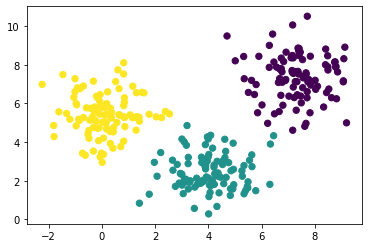

In [151]:
plt.scatter(X[:, 0], X[:, 1],s=40, marker='o', c=model.labels_)
plt.show()

In [152]:
silhouette_score(X, model.labels_)

0.6512697926145397

In [153]:
adjusted_mutual_info_score(Y, model.labels_)

0.9700074953683859

In [179]:
x_train, x_test, y_train, y_test = train_test_split(X, model.labels_, random_state=0, test_size=.2)

model_classification = LogisticRegression(solver='lbfgs', random_state=0).fit(x_train, y_train)

pred = model_classification.predict(x_test)

accuracy_score(y_test, pred)

1.0

Предскажем классы наших двух точек из дз по нашему классификатору

In [178]:
pred_1 = model_classification.predict([[5, 8],[4, 2], [0, 5]])
pred_1

array([0, 1, 2])

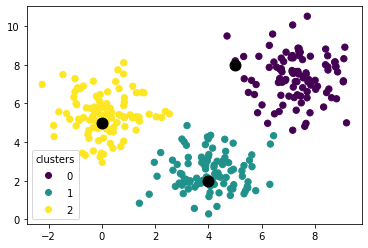

In [191]:
fig, ax = plt.subplots()
sc = ax.scatter(X[:, 0], X[:, 1],s=40, marker='o', c=model.labels_)
ax.scatter([5, 4, 0], [8, 2, 5], s=120, marker='o', c='black')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [1]:
20*1.2**3+20*1.2**2+10*1.2+10

85.35999999999999